In [0]:

%matplotlib inline
from fastai.basics import * 

In [0]:
n=100


In [0]:
# Dummy data ( independent variable )


x = torch.ones(n,2) 


In [4]:
x[:3]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [5]:
x[:,0].uniform_(-1.,1)


tensor([ 1.7131e-01,  5.1215e-01, -4.8553e-02,  3.0881e-01, -6.0280e-01,
        -4.4739e-01,  4.0159e-01,  6.0885e-01,  3.9686e-02,  9.2900e-01,
        -5.2750e-01,  2.1599e-01, -6.6991e-01,  5.8638e-01,  8.1330e-01,
        -6.4736e-02,  9.8386e-01, -7.8900e-01, -2.3071e-01,  2.2826e-01,
         4.6176e-01, -9.2939e-01, -4.7127e-01,  7.4181e-01, -9.2605e-02,
        -3.8813e-01, -2.0515e-01, -9.2279e-01,  4.9400e-01,  6.0640e-01,
        -8.4708e-01, -8.2692e-01,  3.4261e-04,  1.0666e-01,  1.8059e-01,
        -9.9763e-01, -3.3322e-01, -2.2614e-01,  7.9521e-01, -2.0961e-02,
        -5.8239e-01,  6.1349e-01,  9.7541e-01, -4.0862e-01, -3.6121e-01,
        -8.1339e-01,  8.9905e-01,  7.8701e-01,  4.9116e-01, -8.6453e-01,
        -1.9204e-01, -4.9847e-01,  5.5897e-01, -6.2808e-01,  5.2201e-02,
         5.7043e-01, -1.0987e-01,  2.8155e-01, -7.3794e-01,  4.8458e-02,
         3.0881e-01, -3.9167e-02, -1.6425e-01, -7.1946e-03, -6.3008e-01,
        -3.6119e-01,  4.5606e-01, -7.6539e-01,  7.8

In [6]:
x[:5]

tensor([[ 0.1713,  1.0000],
        [ 0.5121,  1.0000],
        [-0.0486,  1.0000],
        [ 0.3088,  1.0000],
        [-0.6028,  1.0000]])

In [7]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
# Dummy data dependent variable

# NOTE ther would be broadcasting, as no of rows in a dont match with that of x
y = x@a + torch.rand(n) 

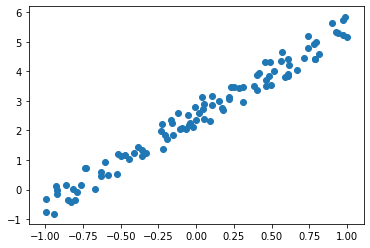

In [11]:
plt.scatter(x[:,0], y);

In [0]:
# Loss function
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:
# make a tensor with random values
a = tensor(-1.,1)

In [0]:
# y_hat is gonna be our Prediction using independent variable x and starting with some random weight tensor ( Then SGC will make new "a" tensor  )
y_hat = x@a


In [15]:
mse(y_hat, y)

tensor(7.7525)

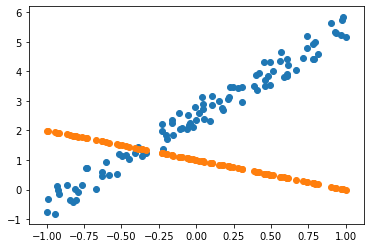

In [17]:

plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

**GRADIENT DESCENT**

In [18]:

a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
# The function that is gonna be using some loss function to update  "a" tensor

def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [20]:

lr = 1e-1
for t in range(100): update()

tensor(7.7525, grad_fn=<MeanBackward0>)
tensor(1.4243, grad_fn=<MeanBackward0>)
tensor(0.4291, grad_fn=<MeanBackward0>)
tensor(0.1736, grad_fn=<MeanBackward0>)
tensor(0.1061, grad_fn=<MeanBackward0>)
tensor(0.0883, grad_fn=<MeanBackward0>)
tensor(0.0835, grad_fn=<MeanBackward0>)
tensor(0.0823, grad_fn=<MeanBackward0>)
tensor(0.0820, grad_fn=<MeanBackward0>)
tensor(0.0819, grad_fn=<MeanBackward0>)


NOTE :
      If u do  plt.scatter(x[:,0],x@a);
      then you will get following error :  
            Can't call numpy() on Variable that requires grad.
      
      the solution to this is that a in x@a must not be  the tensor 
      which requires gradient ( recall : requires_grad=True from pytorch ) 

      so below two lines of codes are making a tensor similar to a but not
      needing gradient


In [0]:
a_d = a.detach().numpy()

In [0]:
a_d_t = tensor(a_d)

In [0]:
res = x@a

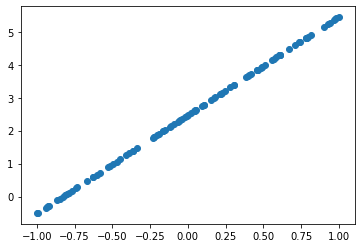

In [30]:
plt.scatter(x[:,0],x@a_d_t);

**ANIMATE IT**

In [0]:

from matplotlib import animation, rc
rc('animation', html='jshtml')

In [41]:

a = nn.Parameter(tensor(-1.,1))
a_d2 = a.detach().numpy()
a_d2_t = tensor( a_d2 ) 

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a_d2_t)
plt.close()

def animate(i):
    update()
    a_d2 = a.detach().numpy()
    a_d2_t = tensor( a_d2 )  
    line.set_ydata(x@a_d2_t)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)